# Campos vetoriais em pyton


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches




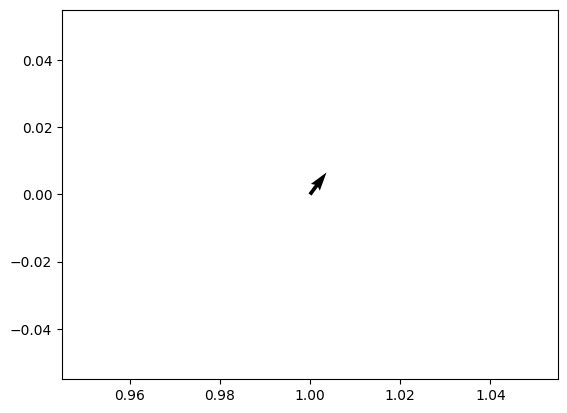

In [15]:
x=1
y=0
u=3
v=4
plt.quiver(x,y,u,v)
plt.show()

----x----
[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]
----y----
[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]
agora depois do meshgrid:
----x----
[[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556

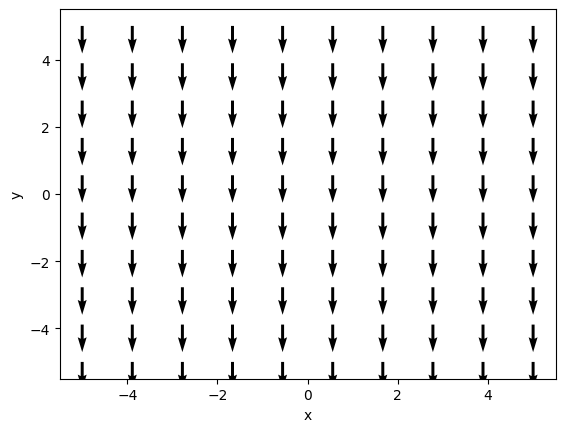

In [9]:
x=np.linspace(-5,5,10)
y=np.linspace(-5,5,10)
print('----x----')
print(x)
print('----y----')
print(y)
print('agora depois do meshgrid:')
(x,y)=np.meshgrid(x,y)
print('----x----')
print(x)
print('----y----')
print(y)
xy = np.dstack([x, y]).reshape(-1, 2)
print('---------------------------------------------------------------\n--------------------------------')
print(xy)
u=0
v=-9.8                 #tentando fazer o campo     
plt.xlabel('x')
plt.ylabel('y')
plt.quiver(x,y,u,v)    #para o cobrir o espaço todo precisamos de meshgrid(combina x com y para preencher o espaço)
plt.show()

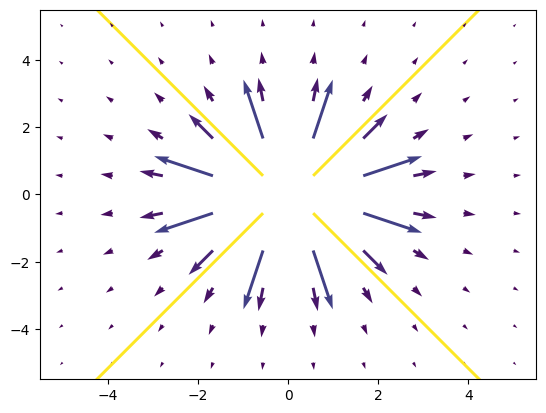

In [13]:
#Simulação do campo elétrico
kq=1
x=np.linspace(-5,5,10)
y=np.linspace(-5,5,10)
(x,y)=np.meshgrid(x,y)
u=kq*x/(x**2+y**2)**(3/2)
v=kq*y/(x**2+y**2)**(3/2)
color=kq/(x**2+y**2) #intensidade do campo elétrico
plt.quiver(x,y,u,v,color) 
plt.show()

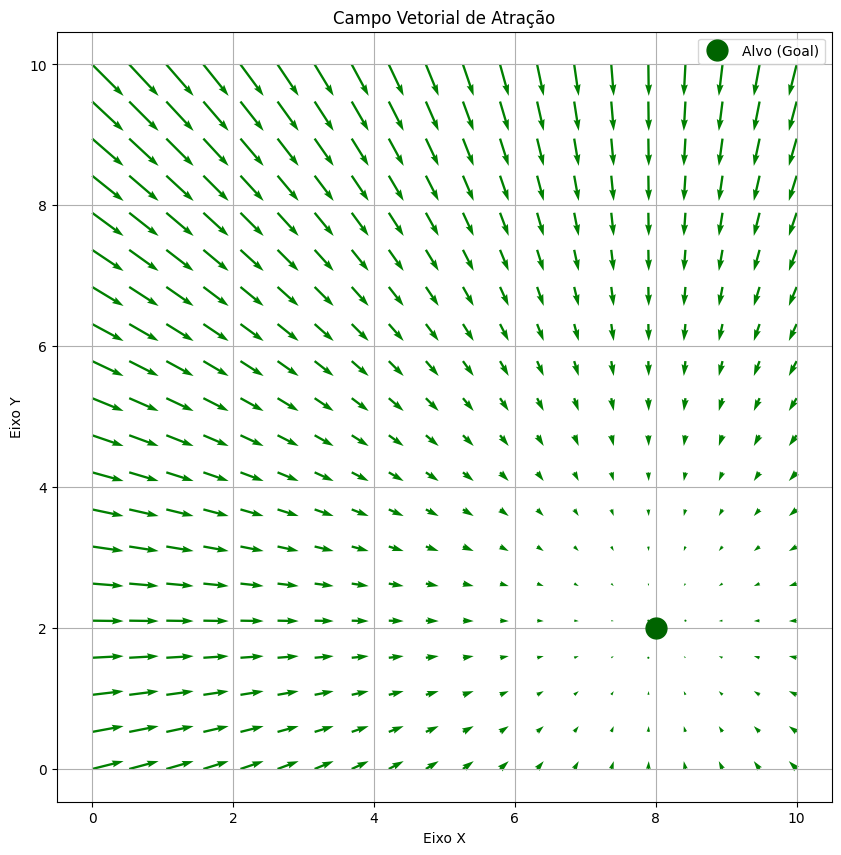

In [2]:


# --- Configurações Iniciais ---
# Vamos definir o tamanho do nosso "mundo"
WORLDX = 10
WORLDY = 10

# 1. Definir o alvo (goal), assim como definimos a carga 'kq' antes
goal = np.array([8, 2]) 
katt = 0.1 # Constante de atração (força do campo)

# 2. Criar a grade de pontos (exatamente como nos seus exemplos)
x_coords = np.linspace(0, WORLDX, 20)
y_coords = np.linspace(0, WORLDY, 20)
X, Y = np.meshgrid(x_coords, y_coords)

# 3. Calcular os componentes do vetor (U, V) para CADA ponto da grade
# Esta é a nova fórmula, muito mais simples que a do campo elétrico!
# U é a componente x do vetor: katt * (x_do_alvo - x_do_ponto_atual)
# V é a componente y do vetor: katt * (y_do_alvo - y_do_ponto_atual)
U = katt * (goal[0] - X)
V = katt * (goal[1] - Y)

# 4. Plotar o campo vetorial (exatamente como antes)
plt.figure(figsize=(10, 10))
plt.quiver(X, Y, U, V, color='green')

# Adicionar um marcador visual para o alvo
plt.plot(goal[0], goal[1], 'o', color='darkgreen', markersize=15, label='Alvo (Goal)')

plt.title('Campo Vetorial de Atração')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)
plt.legend()
plt.axis('equal') # Garante que a escala dos eixos seja a mesma
plt.show()

(0.0, 6.0)

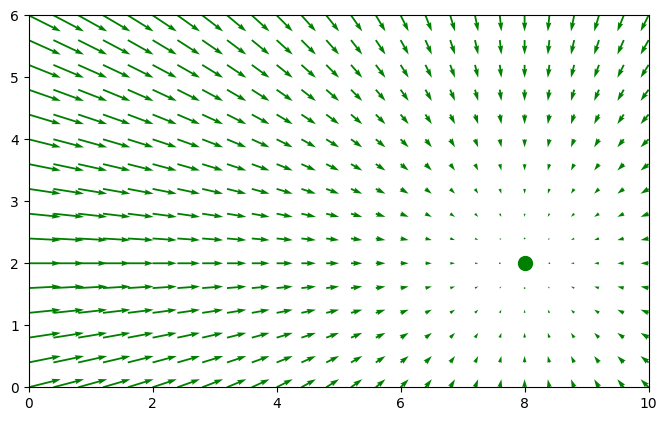

In [2]:
WORLDX, WORLDY = 10, 6 
def att_force(q, goal, katt=.01):
    return katt*(goal - q)

goal = np.array([8, 2])

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

XX, YY = np.meshgrid(np.arange(0, WORLDX+.4, .4), np.arange(0, WORLDY+.4, .4)) # cria a grade de pontos
#print(np.arange(0, WORLDX+.4, .4))
XY = np.dstack([XX, YY]).reshape(-1, 2) #ordena em formato de vetor

Fatt = att_force(XY, goal)
Fatt_x = Fatt[:,0]
Fatt_y = Fatt[:,1]
#print(Fatt)
#print('-----------------------------------------------------------------------')
#print(Fatt_x)
#print('-----------------------------------------------------------------------')
#print(Fatt_y)
#print('-----------------------------------------------------------------------')
ax.quiver(XX, YY, Fatt_x, Fatt_y, color='g')

plt.plot(goal[0], goal[1], 'og', markersize=10)
    
ax.set_xlim(0, WORLDX)
ax.set_ylim(0, WORLDY)

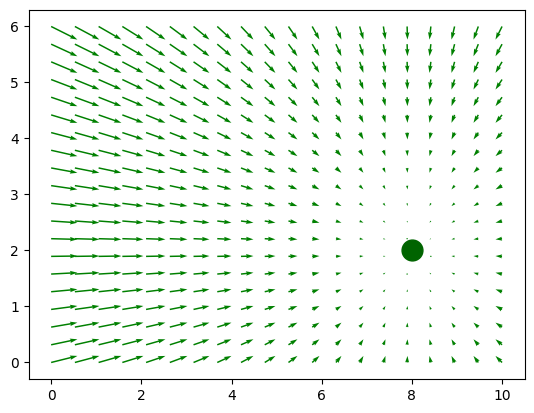

In [4]:
def att_force(q, goal, katt=0.1):
    return katt * (goal - q)

# cria grid (igual você fez, mas em lista de pontos)
x_coords = np.linspace(0, WORLDX, 20)
y_coords = np.linspace(0, WORLDY, 20)
X, Y = np.meshgrid(x_coords, y_coords)

# junta tudo num array de pares (N,2)
XY = np.dstack([X, Y]).reshape(-1, 2)

# aplica a função em todos os pontos
F = att_force(XY, goal)

# separa componentes
Fx = F[:,0].reshape(X.shape)
Fy = F[:,1].reshape(Y.shape)

# plota
plt.quiver(X, Y, Fx, Fy, color='green')
plt.plot(goal[0], goal[1], 'o', color='darkgreen', markersize=15)
plt.show()# cria grid (igual você fez, mas em lista de pontos)


0.5


(0.0, 6.0)

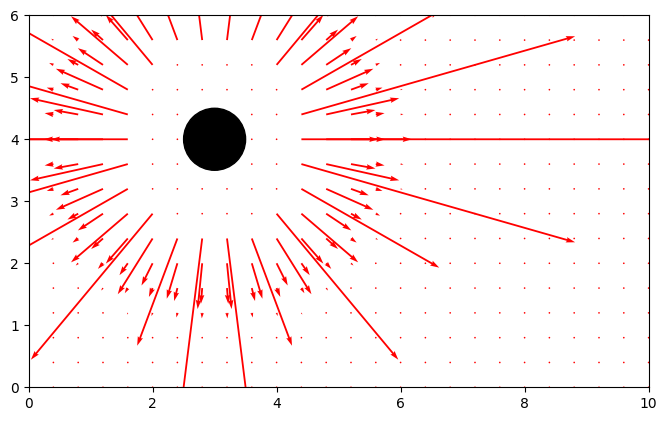

In [28]:
def rep_force(q, obs, R=3, krep=.1):
    
    # Obstáculo: (x, y, r)
    v = q - obs[0:2]
    #print(v)
    #print(obs[0:2])
    print(obs[2])
    d = np.linalg.norm(v, axis=1) - obs[2] #calcula a norma de cada linha
    d = d.reshape((len(v) ,1))
    
    rep = (1/d**2)*((1/d)-(1/R))*(v/d)    
    
    invalid = np.squeeze(d > R)
    rep[invalid, :] = 0
    
    return krep*rep

# Obstáculo: (x, y, r)
obs = np.array([3, 4, .5])

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

Frep = rep_force(XY, obs)
Frep_x = np.copy(Frep[:,0])  # Cuidado com as referências
Frep_y = np.copy(Frep[:,1])  # Cuidado com as referências

# Threshold para visualização
fmax = .15
Fm = np.linalg.norm(Frep, axis=1)
Frep_x[Fm > fmax], Frep_y[Fm > fmax] = 0, 0

ax.quiver(XX, YY, Frep_x, Frep_y, color='r')
ax.add_patch(patches.Circle((obs[0], obs[1]), obs[2], color='k'))

ax.set_xlim(0, WORLDX)
ax.set_ylim(0, WORLDY)

In [15]:
v=[1,2,3,4,5,6,7,8,9]
print(v[0:3])

[1, 2, 3]
